In [1]:
# Tech Challenge - Fase 1

# GRUPO: 69

# Integrante do Grupo
# - RM364426 - Luhan Melo Tavares de Lacerda - luhanlacerda@gmail.com

# O Problema

# Você é um profissional encarregado de desenvolver um modelo preditivo de regressão para prever o valor dos custos médicos individuais cobrados pelo seguro de saúde.

# A base de dados para este desafio pode ser algo como no exemplo a seguir:

#idade,gênero,imc,filhos,fumante,região,encargos
#Você precisa apenas alimentar ela com mais informações ou utilizar uma outra de sua preferência.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

# Configurações para melhorar visualização dos plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
# Carregando a base
dados = pd.read_csv("./base/Health_insurance.csv", sep=',')

# Definindo coluna target
target_column = 'charges'

# Visualizando as primeiras linhas dos dados
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Visualizando a dimensão de dados (quantidade de linhas x colunas)
dados.shape

(1338, 7)

In [10]:
# Analisando os tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Estatística descritiva básica da base
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
# Analisando se há algum dado nullo
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#### VERIFICANDO QUANTIDADE DE DADOS POR CATEGORIA ####

<Figure size 600x600 with 0 Axes>

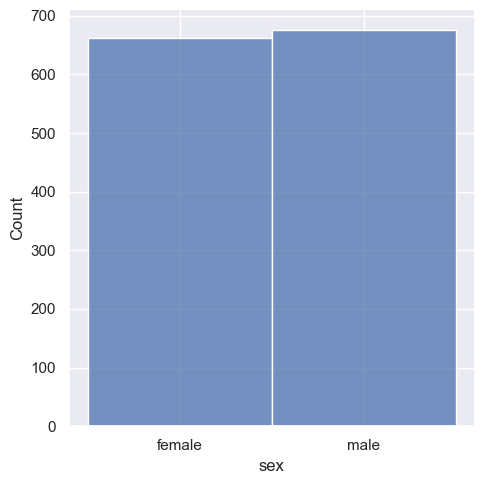

In [14]:
#Distribuição por sex
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dados['sex'])
plt.show()

<Figure size 600x600 with 0 Axes>

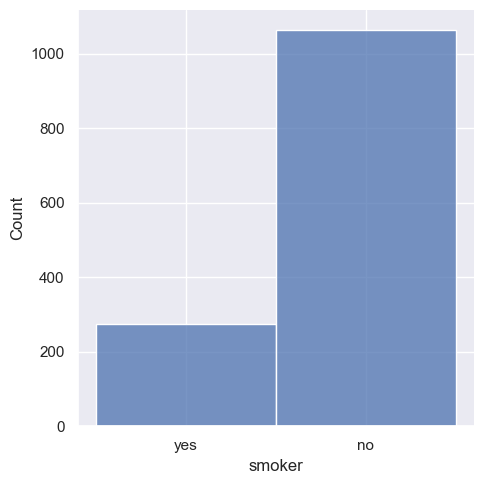

In [15]:
# Distribuição pela categoria smoker
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dados['smoker'])
plt.show()

<Figure size 600x600 with 0 Axes>

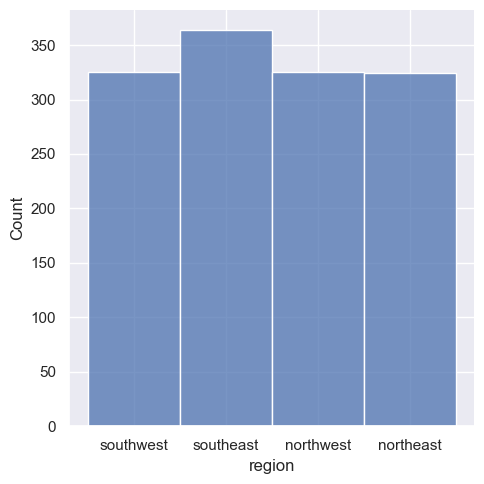

In [16]:
# Distribuição por region
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dados['region'])
plt.show()

<Figure size 600x600 with 0 Axes>

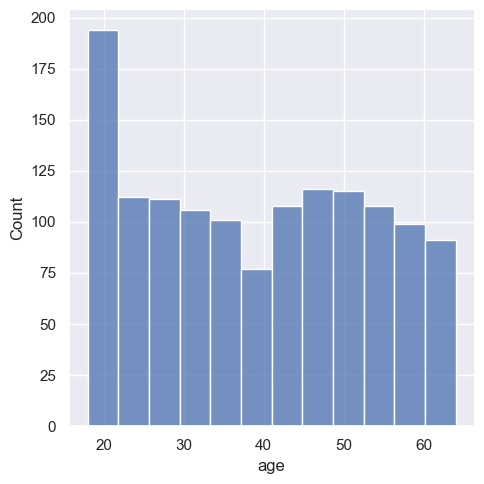

In [17]:
# Distribuição por idade
sns.set()
plt.figure(figsize=(6,6))
sns.displot(dados['age'])
plt.show()

In [18]:
#### ANÁLISES ####

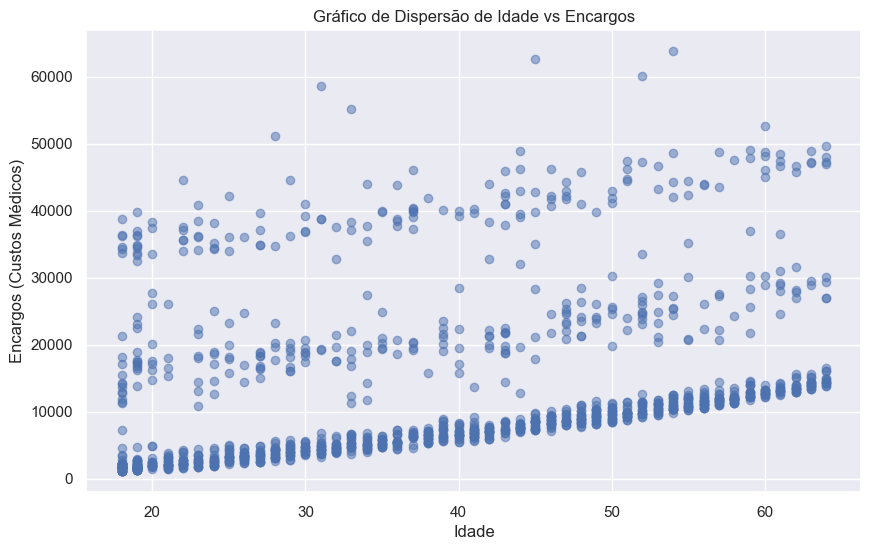

In [19]:
# Gráfico de Dispersão de age vs charges
plt.figure(figsize=(10, 6))
plt.scatter(dados['age'], dados['charges'], alpha=0.5)
plt.title('Gráfico de Dispersão de Idade vs Encargos')
plt.xlabel('Idade')
plt.ylabel('Encargos (Custos Médicos)')
plt.show()

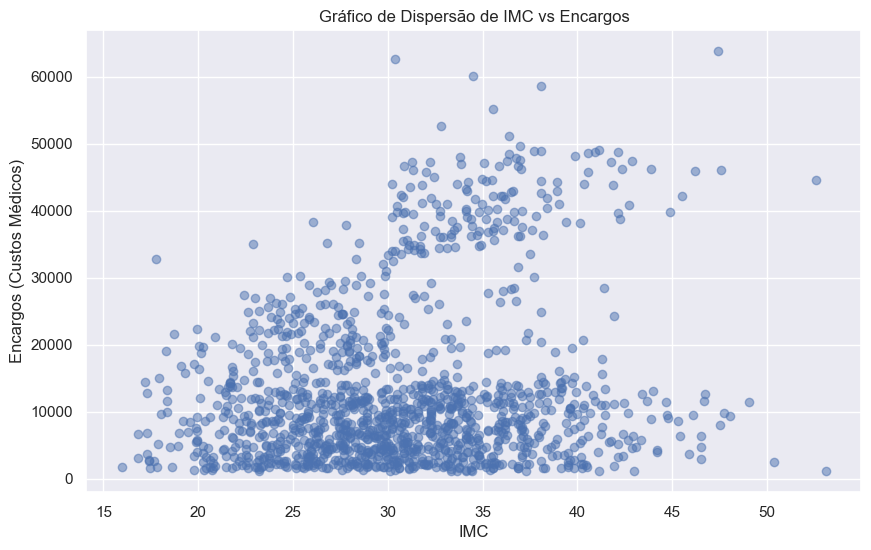

In [20]:
# Gráfico de Dispersão de bmi vs charges
plt.figure(figsize=(10, 6))
plt.scatter(dados['bmi'], dados['charges'], alpha=0.5)
plt.title('Gráfico de Dispersão de IMC vs Encargos')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.show()

<Axes: >

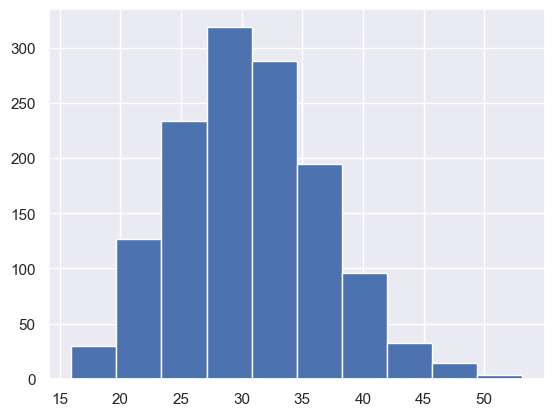

In [21]:
dados["bmi"].hist()

In [22]:
#### CLASSIFICANDO IMC COM FIM DE UMA ANÁLISE MAIS APROFUNDADA ####

In [57]:
dados["bmi_cat"] = np.ceil(dados["bmi"] / 1.5) # ceil para arredondar valores para cima
dados["bmi_cat"] = dados["bmi_cat"].where(dados["bmi"] < 30, 4.0)

In [58]:
dados["bmi_cat"] = pd.cut(dados["bmi"], bins=[15, 20, 25, 30, np.inf], labels=[1, 2, 3, 4])

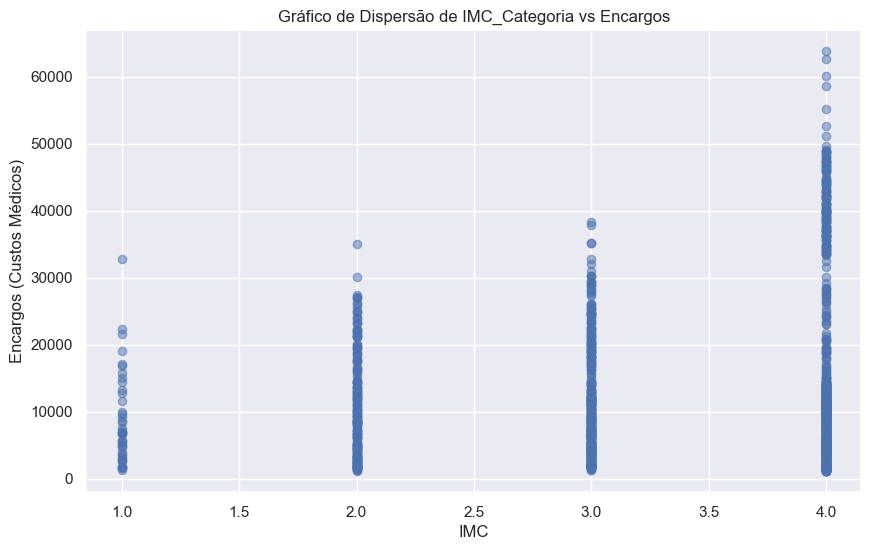

In [59]:
# Gráfico de Dispersão de Idade vs Encargos
plt.figure(figsize=(10, 6))
plt.scatter(dados['bmi_cat'], dados['charges'], alpha=0.5)
plt.title('Gráfico de Dispersão de IMC_Categoria vs Encargos')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.show()

<Figure size 1000x600 with 0 Axes>

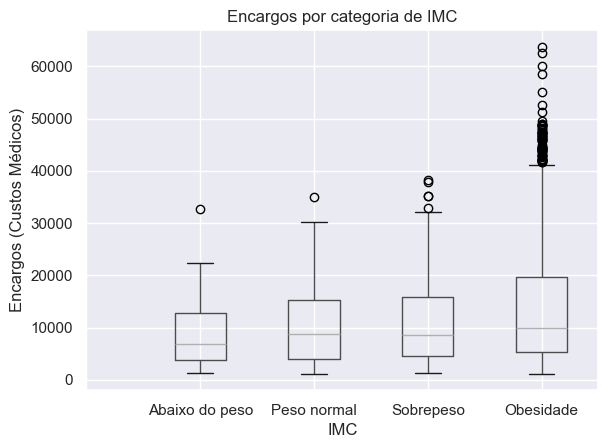

In [60]:
# Boxplot de Encargos por quantidade de filhos
plt.figure(figsize=(10, 6))
dados.boxplot(column='charges', by='bmi_cat')
plt.title('Encargos por categoria de IMC')
plt.xlabel('IMC')
plt.ylabel('Encargos (Custos Médicos)')
plt.suptitle('')
# Substituindo as labels
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['', 'Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade'])
plt.show()

In [61]:
print('''
A mediana dos custos médicos parece aumentar conforme o IMC aumenta,
especialmente notável na categoria "obesidade", onde a mediana é maior em
comparação com as outras categorias.
''')
# ------------------------------------------------------------------------------
print('''
As categorias "Peso normal" e "Sobrepeso" têm uma dispersão similar,
enquanto a categoria "obesidade" tem uma caixa um pouco maior, indicando
uma maior variabilidade nos encargos médicos.
''')
# ------------------------------------------------------------------------------
print('''
Existem vários outliers, especialmente na categoria "obesidade", o que
sugere que alguns indivíduos com obesidade têm encargos médicos
significativamente maiores que o restante.
''')


A mediana dos custos médicos parece aumentar conforme o IMC aumenta,
especialmente notável na categoria "obesidade", onde a mediana é maior em
comparação com as outras categorias.


As categorias "Peso normal" e "Sobrepeso" têm uma dispersão similar,
enquanto a categoria "obesidade" tem uma caixa um pouco maior, indicando
uma maior variabilidade nos encargos médicos.


Existem vários outliers, especialmente na categoria "obesidade", o que
sugere que alguns indivíduos com obesidade têm encargos médicos
significativamente maiores que o restante.



In [62]:
#### ANÁLISE PARA FUMANTES ####

<Figure size 1000x600 with 0 Axes>

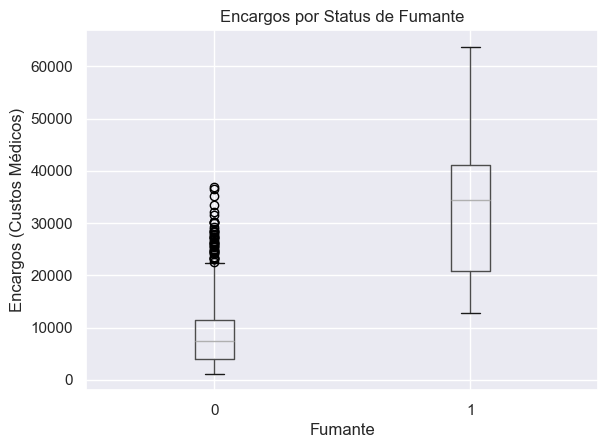

In [63]:
# Boxplot de Encargos por quantidade de filhos
plt.figure(figsize=(10, 6))
dados.boxplot(column='charges', by='smoker')
plt.title('Encargos por Status de Fumante')
plt.xlabel('Fumante')
plt.ylabel('Encargos (Custos Médicos)')
plt.suptitle('')
plt.show()

In [64]:
print('''
A mediana dos custos médicos para fumantes ("yes") é significativamente mais
alta em comparação com os não fumantes ("no"). Isso sugere que, em média,
fumantes têm encargos médicos maiores.
''')
# ------------------------------------------------------------------------------
print('''
- A caixa para os fumantes é muito maior do que para os não fumantes,
indicando uma maior dispersão (variabilidade) nos custos médicos entre
os fumantes.

- A caixa dos não fumantes é mais compacta, sugerindo que a maioria dos não
fumantes tem custos médicos relativamente mais baixos e menos variáveis.
''')
# ------------------------------------------------------------------------------
print('''
- Para os não fumantes, há muitos outliers, sugerindo que embora a maioria
tenha custos médicos baixos, alguns indivíduos não fumantes enfrentam custos
médicos significativamente maiores.

- Para os fumantes, não há muitos outliers visíveis, mas a distribuição
em si já é mais ampla, indicando que os altos custos são comuns entre os
fumantes.
''')


A mediana dos custos médicos para fumantes ("yes") é significativamente mais
alta em comparação com os não fumantes ("no"). Isso sugere que, em média,
fumantes têm encargos médicos maiores.


- A caixa para os fumantes é muito maior do que para os não fumantes,
indicando uma maior dispersão (variabilidade) nos custos médicos entre
os fumantes.

- A caixa dos não fumantes é mais compacta, sugerindo que a maioria dos não
fumantes tem custos médicos relativamente mais baixos e menos variáveis.


- Para os não fumantes, há muitos outliers, sugerindo que embora a maioria
tenha custos médicos baixos, alguns indivíduos não fumantes enfrentam custos
médicos significativamente maiores.

- Para os fumantes, não há muitos outliers visíveis, mas a distribuição
em si já é mais ampla, indicando que os altos custos são comuns entre os
fumantes.



In [65]:
#### CONVERTENDO VARIÁVEIS CATEGÓRICAS ####

In [81]:
# Converting Categorical Columns into Numerical Columns

dados.replace({'sex':{'female':0, 'male':1}}, inplace=True)
dados.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
dados.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

# Removendo coluna bmi_cat
del dados['bmi_cat']

In [82]:
#### BUSCANDO CORRELAÇÕES ####

In [83]:
corr_matrix = dados.corr()
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.056993
Name: charges, dtype: float64

Text(0.5, 1.0, 'Mapa de calor de correlação triangular')

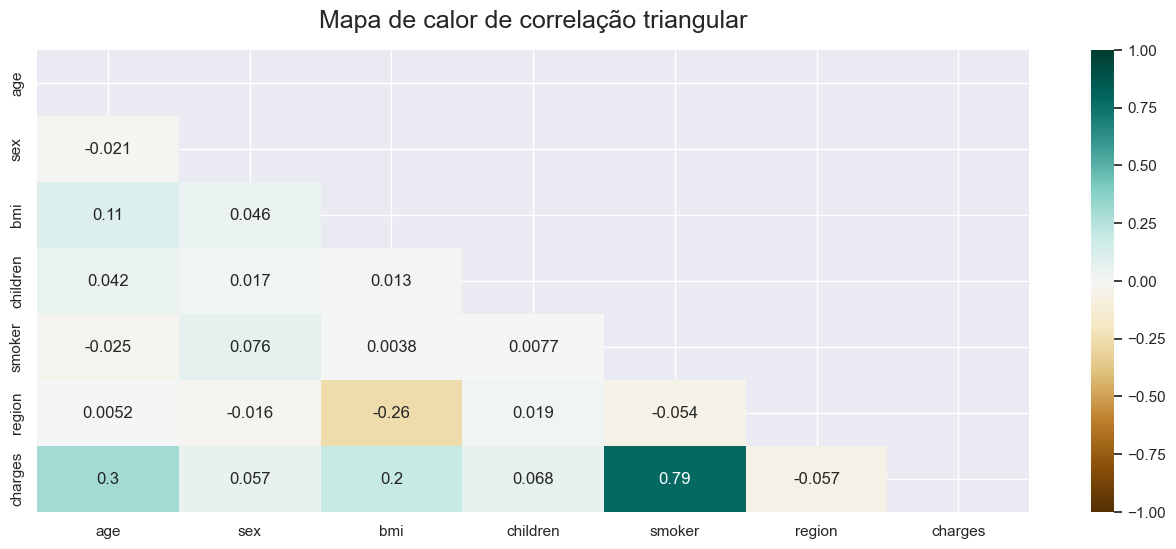

In [84]:
plt.figure(figsize=(16, 6))
# define a máscara para definir os valores no triângulo superior como True
mask = np.triu(np.ones_like(dados.corr(), dtype=bool))
heatmap = sns.heatmap(dados.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Mapa de calor de correlação triangular', fontdict={'fontsize':18}, pad=16)

In [85]:
print('''
1. Correlação entre fumante e encargos (0.79):

Alta Correlação Positiva: Há uma correlação positiva forte entre o status de
fumante e os encargos médicos, indicando que ser fumante está fortemente
associado a custos médicos mais elevados. Isso é consistente com o que foi
observado anteriormente no boxplot.''')
# ------------------------------------------------------------------------------
print('''
2. Correlação entre imc e encargos (0.2):

Correlação Moderada Positiva: Existe uma correlação moderada positiva entre o
IMC e os encargos médicos. Isso sugere que indivíduos com IMC mais alto tendem
a ter encargos médicos mais elevados, embora a correlação não seja tão forte
quanto a observada entre fumante e encargos.
''')
# ------------------------------------------------------------------------------
print('''
3. Correlação entre idade e encargos (0.3):

Correlação Moderada Positiva: A idade também tem uma correlação positiva
moderada com os encargos médicos. Isso sugere que, à medida que a idade aumenta,
os encargos médicos tendem a aumentar, possivelmente devido a problemas de
saúde relacionados à idade.
''')


1. Correlação entre fumante e encargos (0.79):

Alta Correlação Positiva: Há uma correlação positiva forte entre o status de
fumante e os encargos médicos, indicando que ser fumante está fortemente
associado a custos médicos mais elevados. Isso é consistente com o que foi
observado anteriormente no boxplot.

2. Correlação entre imc e encargos (0.2):

Correlação Moderada Positiva: Existe uma correlação moderada positiva entre o
IMC e os encargos médicos. Isso sugere que indivíduos com IMC mais alto tendem
a ter encargos médicos mais elevados, embora a correlação não seja tão forte
quanto a observada entre fumante e encargos.


3. Correlação entre idade e encargos (0.3):

Correlação Moderada Positiva: A idade também tem uma correlação positiva
moderada com os encargos médicos. Isso sugere que, à medida que a idade aumenta,
os encargos médicos tendem a aumentar, possivelmente devido a problemas de
saúde relacionados à idade.



In [95]:
dados = pd.read_csv("./base/Health_insurance.csv", sep=',')

In [96]:
#### PRÉ PROCESSAMENTO DE DADOS ####

In [97]:
# USAR DBSCAN POR CAUSA DA DENSIDADE (ALTA CONCENTRACAO DE DADOS)

In [98]:
# Iniciar com o pré processamentos do nosso dataset, realizando as nossas padronizações e encodeds.

from sklearn.model_selection import train_test_split

# Obtendos nossas variáveis X e y
X = dados.drop(target_column, axis=1)
y = dados[target_column]

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_features, categorical_features

(['age', 'bmi', 'children'], ['sex', 'smoker', 'region'])

In [99]:
# Splitar nossa base de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [100]:
# definindo 2 pipelines para realizar as nossas transformações

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Tratamento para possíveis valores nulos e dimensionamento padronizado
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),('scaler', StandardScaler())])

# Tratamento para codificação de variáveis categóricas
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first'))])

In [101]:
# Combinando nossas transformações
preprocessor = ColumnTransformer(
	transformers=[
    	('num', numeric_transformer, numeric_features),
    	('cat', categorical_transformer, categorical_features)
	]
)

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'bmi', 'children']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['sex', 'smoker', 'region'])])

In [102]:
# Aplicando ao nosso dataset

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

preprocessor.get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'cat__sex_male',
       'cat__smoker_yes', 'cat__region_northwest',
       'cat__region_southeast', 'cat__region_southwest'], dtype=object)

In [103]:
#### Modelagem ####

In [104]:
# Importando os nossos modelos que serão utilizados. 
# Utilizaremos a validação cruzada e o tunning dos hyper parâmetros para obter a melhor configuração dos modelos.

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble._forest import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

# Definindo o número de kfolds com embaralhamento
folds = 5
kfold = KFold(n_splits=folds, shuffle=True)

# Métrica de desempenho = melhor acurácia
# https://scikit-learn.org/stable/modules/model_evaluation.html
# gs_metric = make_scorer(mean_absolute_error, greater_is_better=False)
gs_metric = make_scorer(r2_score, greater_is_better=True)

# Controle de verbosidade
verbose_flag = 3

In [105]:
#### MODELO - REGRESSÃO LINEAR ####

In [106]:
# Configurando e avaliando o modelo de Regressão Linear
params = {"fit_intercept": [True, False],}

grid = GridSearchCV(estimator=LinearRegression(), 
                    param_grid=params,
                    scoring=gs_metric,
					return_train_score=True,
                    cv=folds, n_jobs=4, verbose=verbose_flag)

grid.fit(X_train_processed, y_train)

# Selecionando os melhores hiperparametros com base nos dados de treino
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validation Score: {grid.best_score_:.2f}')

# model_lr = LinearRegression(fit_intercept=True)
model_lr = grid.best_estimator_
model_lr

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'fit_intercept': True}
Best Cross-Validation Score: 0.73


LinearRegression()

In [107]:
#### MODELO - LASSO ####

In [108]:
# Configurando e avaliando o modelo Lasso
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

grid = GridSearchCV(estimator=Lasso(), 
                    param_grid=params,
                    scoring=gs_metric,
					return_train_score=True,
                    cv=folds, n_jobs=4, verbose=verbose_flag)

grid.fit(X_train_processed, y_train)

# Selecionando os melhores hiperparametros com base nos dados de treino
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validation Score: {grid.best_score_:.2f}')

# model_lasso = Lasso(alpha=10)
model_lasso = grid.best_estimator_
model_lasso

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'alpha': 100}
Best Cross-Validation Score: 0.73


Lasso(alpha=100)

In [109]:
#### MODELO - RIDGE ####

In [110]:
# Configurando e avaliando o modelo Ridge
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

grid = GridSearchCV(estimator=Ridge(), 
                    param_grid=params,
                    scoring=gs_metric,
					return_train_score=True,
                    cv=folds, n_jobs=4, verbose=verbose_flag)

grid.fit(X_train_processed, y_train)

# Selecionando os melhores hiperparametros com base nos dados de treino
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validation Score: {grid.best_score_:.2f}')

# model_ridge = Ridge(alpha=0.0001)
model_ridge = grid.best_estimator_
model_ridge

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters: {'alpha': 1.0}
Best Cross-Validation Score: 0.73


Ridge()

In [111]:
#### MODELO - DECISION TREE REGRESSOR ####

In [112]:
# Configurando e avaliando o modelo DecisionTreeRegressor
params = {'max_depth': [d for d in range(1,16)], 'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error']}

grid = GridSearchCV(estimator=DecisionTreeRegressor(), 
                    param_grid=params,
                    scoring=gs_metric,
					return_train_score=True,
                    cv=folds, n_jobs=4, verbose=verbose_flag)

grid.fit(X_train_processed, y_train)

# Selecionando os melhores hiperparametros com base nos dados de treino
best_params = grid.best_params_
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validation Score: {grid.best_score_:.2f}')

# model_dtr = DecisionTreeRegressor(max_depth=4)
model_dtr = grid.best_estimator_
model_dtr

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'criterion': 'poisson', 'max_depth': 4}
Best Cross-Validation Score: 0.84


DecisionTreeRegressor(criterion='poisson', max_depth=4)

In [113]:
#### MODELO - KNN ####

In [114]:
# Configurando e avaliando o modelo KNN

params = {'n_neighbors': [n for n in range(1,16)], 'weights': ["uniform", "distance"]}

grid = GridSearchCV(estimator=KNeighborsRegressor(), 
                    param_grid=params,
                    scoring=gs_metric,
					return_train_score=True,
                    cv=folds, n_jobs=4, verbose=verbose_flag)

grid.fit(X_train_processed, y_train)

# Selecionando os melhores hiperparametros com base nos dados de treino
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validation Score: {grid.best_score_:.2f}')

# model_knn = KNeighborsRegressor(n_neighbors=2, weights="distance")
model_knn = grid.best_estimator_
model_knn

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score: 0.70


KNeighborsRegressor(n_neighbors=3, weights='distance')

In [115]:
#### MODELO - RANDOM FOREST REGRESSOR ####

In [116]:
# Configurando o modelo RandomForestRegressor

params = {'n_estimators': [n for n in range(40,70)], 'max_depth': [n for n in range(1,10)]}

grid = GridSearchCV(estimator=RandomForestRegressor(), 
                    param_grid=params,
                    scoring=gs_metric,
					return_train_score=True,
                    cv=folds, n_jobs=4, verbose=verbose_flag)

grid.fit(X_train_processed, y_train)

# Selecionando os melhores hiperparametros com base nos dados de treino
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Cross-Validation Score: {grid.best_score_:.2f}')

model_rf = grid.best_estimator_
model_rf

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'max_depth': 4, 'n_estimators': 63}
Best Cross-Validation Score: 0.85


RandomForestRegressor(max_depth=4, n_estimators=63)

In [117]:
#### TREINAMENTO E AVALIAÇÃO DO MODELO ####

In [118]:
dic_models = {}

# Treinando modelo LR
model_lr.fit(X_train_processed, y_train)
y_pred_lr = model_lr.predict(X_test_processed)
lr_result = cross_val_score(model_lr, X_train_processed, y_train, cv=kfold, scoring=gs_metric)
dic_models["LR"] = lr_result.mean()

# Treinando modelo Lasso
model_lasso.fit(X_train_processed, y_train)
y_pred_lasso = model_lasso.predict(X_test_processed)
lasso_result = cross_val_score(model_lasso, X_train_processed, y_train, cv=kfold, scoring=gs_metric)
dic_models["Lasso"] = lasso_result.mean()

# Treinando modelo Ridge
model_ridge.fit(X_train_processed, y_train)
y_pred_ridge = model_ridge.predict(X_test_processed)
ridge_result = cross_val_score(model_ridge, X_train_processed, y_train, cv=kfold, scoring=gs_metric)
dic_models["Ridge"] = ridge_result.mean()

# Treinando modelo DTR
model_dtr.fit(X_train_processed, y_train)
y_pred_dtr = model_dtr.predict(X_test_processed)
dtr_result = cross_val_score(model_dtr, X_train_processed, y_train, cv=kfold, scoring=gs_metric)
dic_models["DTR"] = dtr_result.mean()

# Treinando modelo KNN
model_knn.fit(X_train_processed, y_train)
y_pred_knn = model_knn.predict(X_test_processed)
knn_result = cross_val_score(model_knn, X_train_processed, y_train, cv=kfold, scoring=gs_metric)
dic_models["KNN"] = knn_result.mean()

# Treinando modelo RF
model_rf.fit(X_train_processed, y_train)
y_pred_rf = model_rf.predict(X_test_processed)
rf_result = cross_val_score(model_rf, X_train_processed, y_train, cv=kfold, scoring=gs_metric)
dic_models["RF"] = rf_result.mean()

In [119]:
#### VALIDAÇÃO ESTATÍSTICA ####

In [120]:
# Criando método para obter as métricas dos resultados dos modelos e imprimi-los

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def validade_model(model, y_test, y_pred_model, result):
    raiz_erro_medio_quadratico = np.sqrt(mean_squared_error(y_test, y_pred_model))
    erro_absoluto_medio = mean_absolute_error(y_test, y_pred_model)
    
    r_quadrado = result.mean()
    
    print(f"Modelo: {model}")
    # print(f"Coeficientes: {model.coef_}")
    print(f'Raiz Erro Médio Quadrático: {raiz_erro_medio_quadratico}')
    print(f'Erro Absoluto Médio: {erro_absoluto_medio}')
    print(f'R² (coeficiente de determinação): {r_quadrado}')
    print("")

In [121]:
validade_model(model_lr, y_test, y_pred_lr, lr_result)

validade_model(model_lasso, y_test, y_pred_lasso, lasso_result)

validade_model(model_ridge, y_test, y_pred_ridge, ridge_result)

validade_model(model_dtr, y_test, y_pred_dtr, dtr_result)

validade_model(model_knn, y_test, y_pred_knn, knn_result)

validade_model(model_rf, y_test, y_pred_rf, rf_result)

Modelo: LinearRegression()
Raiz Erro Médio Quadrático: 5796.284659276275
Erro Absoluto Médio: 4181.194473753652
R² (coeficiente de determinação): 0.7336829850708918

Modelo: Lasso(alpha=100)
Raiz Erro Médio Quadrático: 5853.722106648779
Erro Absoluto Médio: 4248.4924525349
R² (coeficiente de determinação): 0.7359148034674323

Modelo: Ridge()
Raiz Erro Médio Quadrático: 5800.464937731764
Erro Absoluto Médio: 4193.195352935272
R² (coeficiente de determinação): 0.7337339636127564

Modelo: DecisionTreeRegressor(criterion='poisson', max_depth=4)
Raiz Erro Médio Quadrático: 4592.764309715603
Erro Absoluto Médio: 2697.765430538481
R² (coeficiente de determinação): 0.8375632129114112

Modelo: KNeighborsRegressor(n_neighbors=3, weights='distance')
Raiz Erro Médio Quadrático: 6494.981673872454
Erro Absoluto Médio: 3633.1954834312255
R² (coeficiente de determinação): 0.6722106399710345

Modelo: RandomForestRegressor(max_depth=4, n_estimators=63)
Raiz Erro Médio Quadrático: 4492.00031510607
Erro A

In [122]:
# Selecionando o melhor modelo

melhor_modelo = max(dic_models, key=dic_models.get)
print(f"O melhor modelo é : {melhor_modelo} com o valor: {dic_models[melhor_modelo]:.4f}")

O melhor modelo é : RF com o valor: 0.8542


In [123]:
# Testando o melhor modelo

def pred_custo_seguro(age,sex,bmi,children,smoker,region):
    data_row = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    data = pd.DataFrame(data_row)
    
    data_processed = preprocessor.transform(data)
    pred = model_dtr.predict(data_processed)
    valor = round(pred[0], 2)
    return valor

In [124]:
# mulher, nao fumante, nova, IMC Normal
pred_custo_seguro(age = 18, sex = 'female', bmi = 21, children = 0, smoker = 'no', region = 'southeast')

np.float64(2757.95)

In [125]:
# mulher, fumante, nova, IMC Sobrepeso
pred_custo_seguro(age = 23, sex = 'female', bmi = 26, children = 0, smoker = 'yes', region = 'southeast')

np.float64(19598.17)

In [126]:
# homem, não fumante, novo, IMC Normal
pred_custo_seguro(age = 25, sex = 'male', bmi = 23, children = 0, smoker = 'no', region = 'southeast')

np.float64(5703.34)

In [127]:
# homem, fumante, velho, IMC Sobrepeso
pred_custo_seguro(age = 60, sex = 'male', bmi = 35, children = 0, smoker = 'yes', region = 'southeast')

np.float64(46920.63)